In [676]:
import math
import numpy as np
import os

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

sns.set()
sns.set_style("ticks")
sns.set_context("paper")
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

In [677]:
three_d_points = np.array([
    [-0.08, -2.30333333, 1.19666667],  # Top right solar panel
    [-0.15666667, -0.84333333, 1.19666667],  # Top left solar panel
    [-0.08, -2.30333333, -0.78333333],  # Bottom right solar panel
    [-0.15666667, -0.84333333, -0.78333333],  # Bottom left solar panel
    [-0.24333333, 1.03, -0.65333333],  # Bottom left satellite
])

three_d_points_names = [
    'Top right solar panel',
    'Top left solar panel',
    'Bottom right solar panel',
    'Bottom left solar panel',
    'Bottom left satellite'
]


def get_rotated_point(roll, pitch, yaw, point=None):
    if point is None:
        point = [-0.08, -2.30333333, 1.19666667]

    r_roll = np.array([[1, 0, 0],
                       [0, math.cos(roll / 180 * math.pi), -math.sin(roll / 180 * math.pi)],
                       [0, math.sin(roll / 180 * math.pi), math.cos(roll / 180 * math.pi)]])

    r_pitch = np.array([[math.cos(pitch / 180 * math.pi), 0, math.sin(pitch / 180 * math.pi)],
                        [0, 1, 0],
                        [-math.sin(pitch / 180 * math.pi), 0, math.cos(pitch / 180 * math.pi)]])

    r_yaw = np.array([[math.cos(yaw / 180 * math.pi), -math.sin(yaw / 180 * math.pi), 0],
                      [math.sin(yaw / 180 * math.pi), math.cos(yaw / 180 * math.pi), 0],
                      [0, 0, 1]])

    rotation_matrix = r_yaw @ r_pitch @ r_roll

    rotated_3d_points = np.dot(rotation_matrix, point)

    return rotated_3d_points

In [678]:
folder = "../test_images/dynamic_unknowndeg_0to360_5degstep/"
suffixes = ['_linefit_eps2']
colors = ['red', 'green', 'blue']
nice_suffixes = [s.removeprefix("_").replace('_', ' ').capitalize() for s in suffixes]


In [679]:
df_true = pd.read_csv(folder + "real_scores.csv")
df_true = df_true.rename(columns={'correct_roll': 'roll', 'correct_pitch': 'pitch', 'correct_yaw':
    'yaw'})
df_true['img_number'] = df_true.index
df_true['suffix'] = 'true'
df_true

,roll,pitch,yaw,img_number,suffix
0,127.970000,-79.560000,-44.000000,0,true
1,123.295573,-78.244572,-44.152291,1,true
2,119.068439,-76.935369,-44.763274,2,true
3,115.161870,-75.638750,-45.707437,3,true
4,111.491226,-74.359729,-46.901282,4,true
...,...,...,...,...,...
68,157.623186,-84.620406,-54.433702,68,true
69,147.366750,-83.432329,-48.971823,69,true
70,139.573127,-82.170727,-45.978678,70,true
71,133.288987,-80.872993,-44.502381,71,true


In [680]:
df_guess = pd.read_csv(folder + "guesses_linefit_eps2.csv")
df_guess

,img_number,roll,pitch,yaw,x,y,z,roll_min,roll_max,pitch_min,pitch_max,yaw_min,yaw_max,x_min,x_max,y_min,y_max,z_min,z_max
0,0,0.000000,-89.550000,79.000000,0.000000,0.000000,0.000000,-16.000000,16.000000,-97.550000,-81.550000,71.000000,87.000000,-0.400000,0.400000,-0.400000,0.400000,-0.400000,0.400000
1,1,0.000000,-89.550000,79.000000,0.000000,0.000000,0.000000,-52.000000,52.000000,-115.550000,-63.550000,53.000000,105.000000,-1.300000,1.300000,-1.300000,1.300000,-1.300000,1.300000
2,2,0.000000,-89.550000,79.000000,0.000000,0.000000,0.000000,-88.000000,88.000000,-133.550000,-45.550000,35.000000,123.000000,-2.200000,2.200000,-2.200000,2.200000,-2.200000,2.200000
3,3,31.640440,-65.598284,45.217788,0.357736,0.259982,0.343713,23.640440,39.640440,-69.598284,-61.598284,41.217788,49.217788,0.157736,0.557736,0.059982,0.459982,0.143713,0.543713
4,4,31.640440,-65.598284,45.217788,0.357736,0.259982,0.343713,-12.359560,75.640440,-87.598284,-43.598284,23.217788,67.217788,-0.742264,1.457736,-0.840018,1.359982,-0.756287,1.443713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,139,-692.681060,-57.782132,86.067128,0.096579,0.136826,-1.013922,-703.383769,-681.978351,-59.868270,-55.695995,75.099954,97.034302,0.071832,0.121325,0.114525,0.159127,-1.354476,-0.673367
140,140,-695.305404,-57.227685,83.932011,0.088149,0.139679,-1.172856,-705.330744,-685.280065,-59.157318,-55.298051,73.655979,94.208043,0.064583,0.111715,0.117374,0.161984,-1.443015,-0.902697
141,141,-697.822200,-57.111534,81.745566,0.090703,0.141515,-1.190443,-705.596054,-690.048347,-59.213947,-55.009121,73.711320,89.779813,0.064750,0.116656,0.119942,0.163087,-1.485941,-0.894945
142,142,-697.529804,-56.275692,76.241544,0.082741,0.174066,-1.353856,-701.364747,-693.694861,-58.420582,-54.130803,72.087518,80.395570,0.056595,0.108886,0.152995,0.195137,-1.650767,-1.056944


In [681]:
df = pd.read_csv(folder + "fine_scores_linefit_eps2.csv")
df

,img_number,iterations,loss,roll,pitch,yaw,x,y,z
0,0,1428,4.166061e+02,3.072233,-97.550000,87.000000,0.118091,0.038621,-0.400000
1,1,3136,1.787064e+01,2.186629,-100.352337,79.269441,0.345347,0.153349,0.954647
2,2,504,5.840705e-11,31.640440,-65.598284,45.217788,0.357736,0.259982,0.343713
3,3,1260,2.082052e+01,24.719049,-69.598284,46.678813,0.308878,0.256401,0.143713
4,4,1876,1.778021e-10,21.407180,-70.504053,45.460935,0.339863,0.237909,0.196986
...,...,...,...,...,...,...,...,...,...
139,139,378,1.438638e-11,-689.798886,-58.892543,83.288921,0.104988,0.133677,-0.944775
140,140,469,1.571485e-11,-693.511906,-58.693621,82.292609,0.105540,0.134971,-0.976888
141,141,350,1.742727e-02,-694.651753,-57.785167,78.276801,0.096659,0.163087,-1.144578
142,142,476,4.184011e-11,-697.577257,-57.627868,76.715928,0.099241,0.159717,-1.104522


In [682]:
df_guess

,img_number,roll,pitch,yaw,x,y,z,roll_min,roll_max,pitch_min,pitch_max,yaw_min,yaw_max,x_min,x_max,y_min,y_max,z_min,z_max
0,0,0.000000,-89.550000,79.000000,0.000000,0.000000,0.000000,-16.000000,16.000000,-97.550000,-81.550000,71.000000,87.000000,-0.400000,0.400000,-0.400000,0.400000,-0.400000,0.400000
1,1,0.000000,-89.550000,79.000000,0.000000,0.000000,0.000000,-52.000000,52.000000,-115.550000,-63.550000,53.000000,105.000000,-1.300000,1.300000,-1.300000,1.300000,-1.300000,1.300000
2,2,0.000000,-89.550000,79.000000,0.000000,0.000000,0.000000,-88.000000,88.000000,-133.550000,-45.550000,35.000000,123.000000,-2.200000,2.200000,-2.200000,2.200000,-2.200000,2.200000
3,3,31.640440,-65.598284,45.217788,0.357736,0.259982,0.343713,23.640440,39.640440,-69.598284,-61.598284,41.217788,49.217788,0.157736,0.557736,0.059982,0.459982,0.143713,0.543713
4,4,31.640440,-65.598284,45.217788,0.357736,0.259982,0.343713,-12.359560,75.640440,-87.598284,-43.598284,23.217788,67.217788,-0.742264,1.457736,-0.840018,1.359982,-0.756287,1.443713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,139,-692.681060,-57.782132,86.067128,0.096579,0.136826,-1.013922,-703.383769,-681.978351,-59.868270,-55.695995,75.099954,97.034302,0.071832,0.121325,0.114525,0.159127,-1.354476,-0.673367
140,140,-695.305404,-57.227685,83.932011,0.088149,0.139679,-1.172856,-705.330744,-685.280065,-59.157318,-55.298051,73.655979,94.208043,0.064583,0.111715,0.117374,0.161984,-1.443015,-0.902697
141,141,-697.822200,-57.111534,81.745566,0.090703,0.141515,-1.190443,-705.596054,-690.048347,-59.213947,-55.009121,73.711320,89.779813,0.064750,0.116656,0.119942,0.163087,-1.485941,-0.894945
142,142,-697.529804,-56.275692,76.241544,0.082741,0.174066,-1.353856,-701.364747,-693.694861,-58.420582,-54.130803,72.087518,80.395570,0.056595,0.108886,0.152995,0.195137,-1.650767,-1.056944


In [683]:
def plot_guess(guess_type, df=df_guess):
    sns.lineplot(data=df, x='img_number', y=guess_type, color='blue', ci=None)
    sns.lineplot(data=df, x='img_number', y=guess_type + '_min', color='red', ci=None)
    sns.lineplot(data=df, x='img_number', y=guess_type + '_max', color='green', ci=None)
    sns.scatterplot(data=df, x='img_number', y=guess_type, color='black')
    plt.legend(['Guess', 'Min', 'Max', 'Lowest loss estimate'])
    plt.title('SMA ' + guess_type + ' guesses')
    plt.xlabel('Image number')
    plt.ylabel(guess_type + ' (deg)')
    plt.show()

In [684]:
df_guess_mod = df_guess.copy()
# df_guess['roll'] go from -180 to 180
df_guess_mod['roll'] = df_guess['roll'] % 360 - 180
# pitch goes from 0 - 180 to -90 - 90
df_guess_mod['pitch'] = df_guess['pitch'] % 360 - 180
df_guess_mod['yaw'] = df_guess['yaw'] % 360 - 180

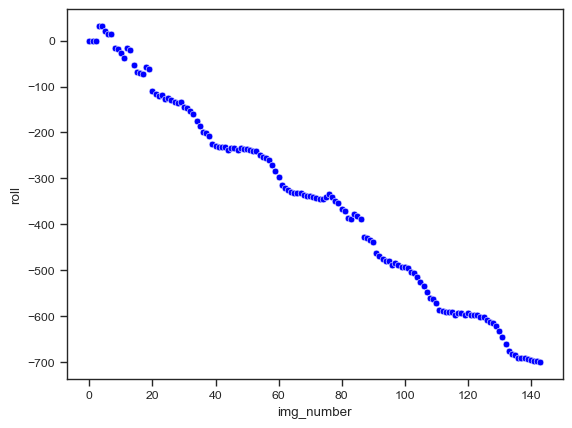

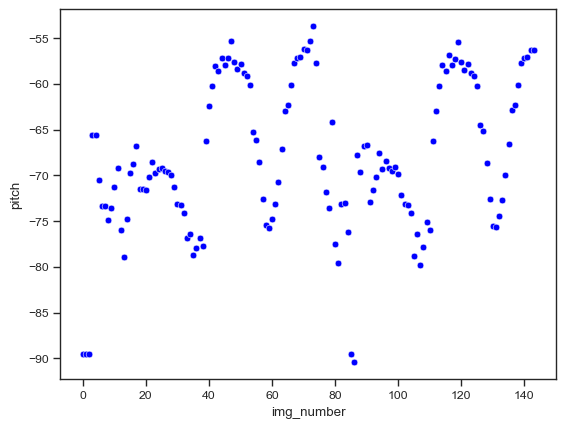

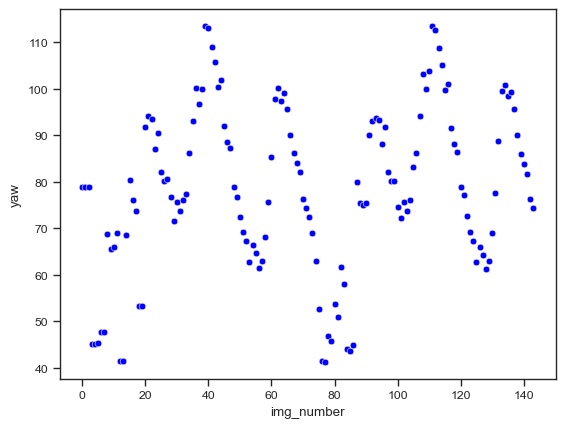

In [685]:
for guess_type in ['roll', 'pitch', 'yaw']:
    # sns.scatterplot(data=df_true, x='img_number', y=guess_type, color='black')
    sns.scatterplot(data=df_guess, x='img_number', y=guess_type, color='blue')
    plt.show()

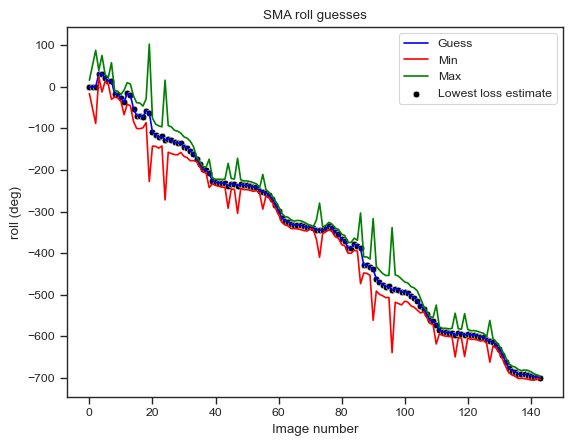

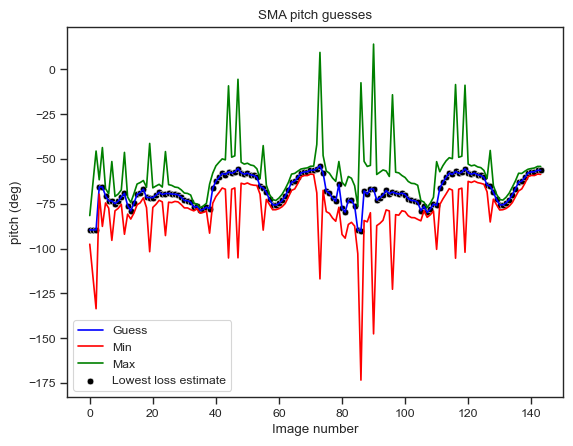

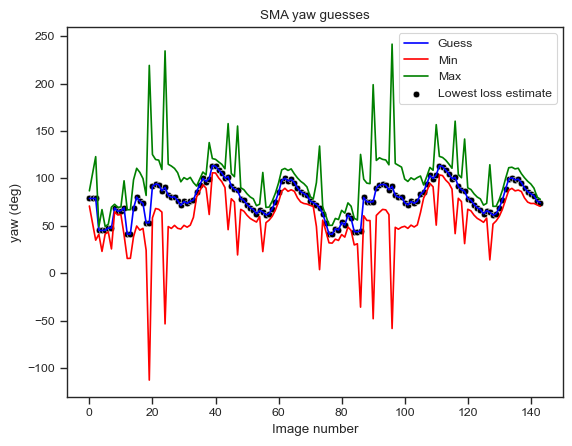

In [686]:
for guess_type in ['roll', 'pitch', 'yaw']:
    plot_guess(guess_type)

In [687]:
# def plot_reg(guess_type):
#     sns.regplot(data=df_guess, x='true_' + guess_type, y='guess_' + guess_type, ci=None)
#     plt.show()

In [688]:
# for guess_type in ['roll', 'pitch', 'yaw']:
#     plot_reg(guess_type)

In [689]:
df_rotated_points = pd.DataFrame()
for i, point in enumerate(three_d_points):
    df_local = df.apply(
        lambda row: get_rotated_point(row['roll'], row['pitch'], row['yaw'], point),
        axis=1, result_type='expand').rename(columns={0: 'x', 1: 'y', 2: 'z'})
    df_local['img_number'] = df['img_number']
    df_local['3d_point'] = three_d_points_names[i]
    df_rotated_points = pd.concat([df_local, df_rotated_points])

In [690]:
df_rotated_points.to_csv(folder + 'rotated_points.csv', index=False)

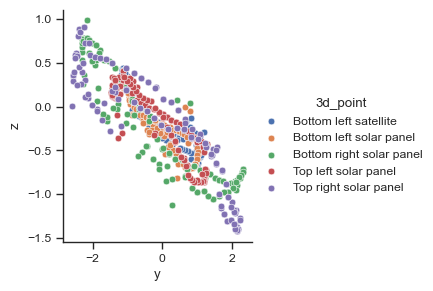

In [691]:
sns.FacetGrid(df_rotated_points, hue='3d_point').map(sns.scatterplot, 'y', 'z').add_legend()

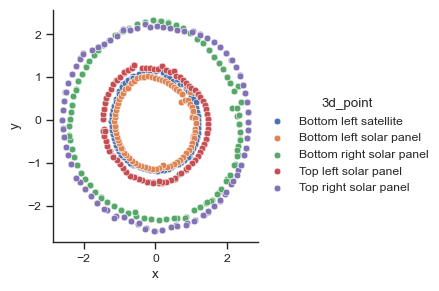

In [692]:
sns.FacetGrid(df_rotated_points, hue='3d_point').map(sns.scatterplot, 'x', 'y').add_legend()

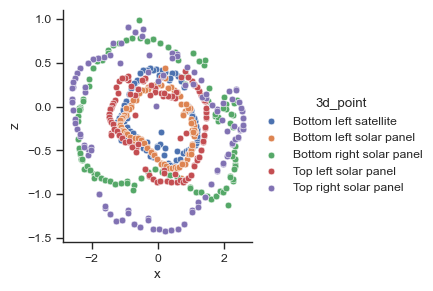

In [693]:
sns.FacetGrid(df_rotated_points, hue='3d_point').map(sns.scatterplot, 'x', 'z').add_legend()